

# 1 - Etapa de extração dos dados

    Fonte dos dados = https://dados.gov.br/dataset/operacoes-copem
    Arquivo renomeado para 'CA_Analise_operacoes_de_credito_de_estados_e_municipios.csv' com codificação UTF-8
    
    

In [1]:
#importando biblioteca pandas
import pandas as pd
import pandera as pa

In [2]:
df = pd.read_csv("CA_Analise_operacoes_de_credito_de_estados_e_municipios.csv", sep=";", encoding="utf8", parse_dates=['Data'], dayfirst=True)

In [3]:
df.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300.000,00",00000.000000/0021-94,3100104.0,Devolvido,2009-08-19,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172.700,00",17944.000104/2008-22,3100104.0,Arquivado,2008-04-17,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300.000,00",17944.000953/2009-67,3100104.0,Deferido,2009-11-20,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187.200,00",17944.001037/2009-44,3100104.0,Deferido,2009-11-20,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1.000.000,00",17944.001324/2013-31,3100104.0,Deferido,2013-11-06,STN




# 2 - Etapa de validação, transformação e limpeza dos dados
        Modificando tipo de dado
        Modificando nome de colunas
        Validação de tipo de dado
        Tratamento de valores nulos
        Remoção de valores duplicados
        
        

In [4]:
#Convertendo valor em float64
df['Valor'] = df['Valor'].apply(lambda d: str(d).replace(".",""))
df['Valor'] = df['Valor'].apply(lambda d: str(d).replace(",","."))
df['Valor'] = df['Valor'].astype('float64')

In [5]:
#Renomeando colunas
df.rename(columns={'Tipo de interessado': 'Tipo_interessado', 
                   'Tipo de operação': 'operação', 
                   'Tipo de credor': 'Tipo_de_credor', 
                   'Número do Processo/PVL' : 'Num_Processo_PVL', 
                   'Código IBGE':'Código_IBGE',
                   'Analisado por':'Analisado_por'  }, inplace=True)

In [6]:
#Validação do dataframe pt_1
schema = pa.DataFrameSchema(
    columns = {
        "Id": pa.Column(pa.Int, required=False),
        "Interessado": pa.Column(pa.String),
        "UF": pa.Column(pa.String, pa.Check.str_length(2,2)),
        "Tipo_interessado": pa.Column(pa.String),
        "operação": pa.Column(pa.String),
        "Finalidade": pa.Column(pa.String),
        "Tipo_de_credor": pa.Column(pa.String),
        "Credor": pa.Column(pa.String),
        "Moeda": pa.Column(pa.String),
        "Valor": pa.Column(pa.Float),
        "Num_Processo_PVL": pa.Column(pa.String),
        "Código_IBGE": pa.Column(pa.Float, nullable=True),
        "Status": pa.Column(pa.String),
        "Data": pa.Column(pa.DateTime),
        "Analisado_por": pa.Column(pa.String),
    }
)

In [7]:
##Validação do dataframe pt_2
schema.validate(df)

,Interessado,UF,Tipo_interessado,operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Num_Processo_PVL,Código_IBGE,Status,Data,Analisado_por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.00,00000.000000/0021-94,3100104.0,Devolvido,2009-08-19,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.00,17944.000104/2008-22,3100104.0,Arquivado,2008-04-17,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.00,17944.000953/2009-67,3100104.0,Deferido,2009-11-20,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.00,17944.001037/2009-44,3100104.0,Deferido,2009-11-20,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.00,17944.001324/2013-31,3100104.0,Deferido,2013-11-06,STN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21420,Áurea,RS,Município,Operação Contratual Interna,Aporte de capital,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1600000.00,PVL02.001743/2019-03,4301552.0,Deferido (PVL-IF),2019-06-17,Instituição Financeira
21421,Ângulo,PR,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Paraná S/A,Real,400000.00,17944.000671/2013-46,4101150.0,Deferido,2013-08-02,STN
21422,Ângulo,PR,Município,Operação Contratual Interna,"Aquisição de terrenos, imóveis e/ou construção...",Instituição Financeira Nacional,Agência de Fomento do Paraná S/A,Real,225000.00,17944.001889/2011-56,4101150.0,Deferido,2012-06-13,STN
21423,Ângulo,PR,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Agência de Fomento do Paraná S/A,Real,155452.28,19406.000313/2010-11,4101150.0,Deferido,2010-07-15,STN


In [8]:
#Informações sobre o tipo dos dados
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21425 entries, 0 to 21424
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Interessado       21425 non-null  object        
 1   UF                21425 non-null  object        
 2   Tipo_interessado  21425 non-null  object        
 3   operação          21425 non-null  object        
 4   Finalidade        21425 non-null  object        
 5   Tipo_de_credor    21425 non-null  object        
 6   Credor            21425 non-null  object        
 7   Moeda             21425 non-null  object        
 8   Valor             21425 non-null  float64       
 9   Num_Processo_PVL  21425 non-null  object        
 10  Código_IBGE       21410 non-null  float64       
 11  Status            21425 non-null  object        
 12  Data              21425 non-null  datetime64[ns]
 13  Analisado_por     21425 non-null  object        
dtypes: datetime64[ns](1), 

In [9]:
#Verificando compatibilidade do dado 'Data' = Datetime
#df.Data.dt.year
#df.Data.dt.month
#df.Data.dt.day

In [10]:
#Verificando compatibilidade do dado 'Valor' = Float64
#Media df.Valor.mean()
#Soma
#df.Valor.mean()

In [11]:
#Verificando possível índice
#df.Num_Processo_PVL.is_unique
#Modificar índice
#df.set_index('Num_Processo_PVL' , inplace=True)
#Reset índice
#df.reset_index(drop=True, inplace=True)

In [12]:
#Soma de valores nulos
#df.isnull().sum()
df.isna().sum()

Interessado          0
UF                   0
Tipo_interessado     0
operação             0
Finalidade           0
Tipo_de_credor       0
Credor               0
Moeda                0
Valor                0
Num_Processo_PVL     0
Código_IBGE         15
Status               0
Data                 0
Analisado_por        0
dtype: int64

In [13]:
#Substituicao para padrao panda
df.replace(['NULL', '', ' '],  pd.NA, inplace=True)

In [14]:
# Dropar linhas com valores nulos
#df.dropna(inplace =True)
df.dropna(subset=['Código_IBGE'], inplace=True)

In [15]:
# Revisão da contagem de nulos
#df.isnull().sum()
df.isna().sum()

Interessado         0
UF                  0
Tipo_interessado    0
operação            0
Finalidade          0
Tipo_de_credor      0
Credor              0
Moeda               0
Valor               0
Num_Processo_PVL    0
Código_IBGE         0
Status              0
Data                0
Analisado_por       0
dtype: int64

In [16]:
#Criar coluna Id como índice se necessário
#df = df.assign(Id = df.index, inplace=True)
#df.set_index('Id' , inplace=True)

In [17]:
#Removedo registros duplicados
df.drop_duplicates()

,Interessado,UF,Tipo_interessado,operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Num_Processo_PVL,Código_IBGE,Status,Data,Analisado_por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.00,00000.000000/0021-94,3100104.0,Devolvido,2009-08-19,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.00,17944.000104/2008-22,3100104.0,Arquivado,2008-04-17,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.00,17944.000953/2009-67,3100104.0,Deferido,2009-11-20,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.00,17944.001037/2009-44,3100104.0,Deferido,2009-11-20,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.00,17944.001324/2013-31,3100104.0,Deferido,2013-11-06,STN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21420,Áurea,RS,Município,Operação Contratual Interna,Aporte de capital,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1600000.00,PVL02.001743/2019-03,4301552.0,Deferido (PVL-IF),2019-06-17,Instituição Financeira
21421,Ângulo,PR,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Paraná S/A,Real,400000.00,17944.000671/2013-46,4101150.0,Deferido,2013-08-02,STN
21422,Ângulo,PR,Município,Operação Contratual Interna,"Aquisição de terrenos, imóveis e/ou construção...",Instituição Financeira Nacional,Agência de Fomento do Paraná S/A,Real,225000.00,17944.001889/2011-56,4101150.0,Deferido,2012-06-13,STN
21423,Ângulo,PR,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Agência de Fomento do Paraná S/A,Real,155452.28,19406.000313/2010-11,4101150.0,Deferido,2010-07-15,STN


In [18]:
#Contagem de atributos por colunas
df.count()

Interessado         21410
UF                  21410
Tipo_interessado    21410
operação            21410
Finalidade          21410
Tipo_de_credor      21410
Credor              21410
Moeda               21410
Valor               21410
Num_Processo_PVL    21410
Código_IBGE         21410
Status              21410
Data                21410
Analisado_por       21410
dtype: int64

In [19]:
#Reduzindo dataframe
df.drop(['Tipo_interessado','Num_Processo_PVL','Analisado_por','Finalidade','Código_IBGE'], axis='columns', inplace=True)
df.head()

,Interessado,UF,operação,Tipo_de_credor,Credor,Moeda,Valor,Status,Data
0,Abadia dos Dourados,MG,Operação Contratual Interna,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,Devolvido,2009-08-19
1,Abadia dos Dourados,MG,Operação Contratual Interna,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.0,Arquivado,2008-04-17
2,Abadia dos Dourados,MG,Operação Contratual Interna,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,Deferido,2009-11-20
3,Abadia dos Dourados,MG,Operação Contratual Interna,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.0,Deferido,2009-11-20
4,Abadia dos Dourados,MG,Operação Contratual Interna,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,Deferido,2013-11-06


In [20]:
#Renomeando atríbutos de Moeda
df['Moeda'] = df['Moeda'].apply(lambda m: str(m).replace("Direito Especial - SDR","DR-SDR"))
df['Moeda'] = df['Moeda'].apply(lambda m: str(m).replace("Dólar dos EUA","Dólar-EUA" ))



# 3 - Etapa de transformação e visualização dos dados
    Visualização dos dados
    Transações por tipo moeda     
    Soma de transações 2002-2021
    Conversão de moedas
    Quais credores possume atividades em 2021


In [21]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [22]:
#Dados última linha
df.iloc[-1]

Interessado                                 Ângulo
UF                                              PR
operação               Operação Contratual Interna
Tipo_de_credor     Instituição Financeira Nacional
Credor            Agência de Fomento do Paraná S/A
Moeda                                         Real
Valor                                    1000000.0
Status                                    Deferido
Data                           2017-09-08 00:00:00
Name: 21424, dtype: object

In [23]:
#Dados primeira linha
df.iloc[0]

Interessado                   Abadia dos Dourados
UF                                             MG
operação              Operação Contratual Interna
Tipo_de_credor    Instituição Financeira Nacional
Credor                    Caixa Econômica Federal
Moeda                                        Real
Valor                                    300000.0
Status                                  Devolvido
Data                          2009-08-19 00:00:00
Name: 0, dtype: object



## Movimentações com Iene no estado de SP



In [24]:
#Movimentações com $Iene no estado de SP
filtroSP = df.UF == 'SP'
filtroMoeda = df.Moeda == 'Iene'
df.loc[filtroSP & filtroMoeda, ['Interessado', 'UF', 'operação', 'Tipo_de_credor','Credor', 'Moeda', 'Valor','Data','Status']]

,Interessado,UF,operação,Tipo_de_credor,Credor,Moeda,Valor,Data,Status
19082,São Paulo,SP,Concessão de garantia,Instituição Financeira Internacional,Japan International Cooperation Agency,Iene,3.358400e+10,2011-11-03,Deferido
19121,São Paulo,SP,Concessão de garantia,Instituição Financeira Internacional,Japan Bank for International Cooperation,Iene,5.593089e+08,2004-06-08,Deferido
19124,São Paulo,SP,Concessão de garantia,Instituição Financeira Internacional,Japan International Cooperation Agency,Iene,1.916900e+10,2010-10-09,Deferido




## Movimentações com Dólar-EUA no estado do ACRE



In [25]:
#Movimentações com $Dólar-EUA no estado do ACRE
filtroAC = df.UF == 'AC'
filtroMoeda = df.Moeda == 'Dólar-EUA'
df.loc[filtroAC & filtroMoeda, ['Interessado', 'UF', 'operação', 'Tipo_de_credor','Credor', 'Moeda', 'Valor','Data','Status']]

,Interessado,UF,operação,Tipo_de_credor,Credor,Moeda,Valor,Data,Status
77,Acre,AC,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar-EUA,156805840.0,2002-06-05,Encaminhado à PGFN com manifestação técnica fa...
88,Acre,AC,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,150000000.0,2016-02-29,Encaminhado à PGFN com manifestação técnica fa...
94,Acre,AC,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar-EUA,22500000.0,2016-11-04,Arquivado por decurso de prazo
95,Acre,AC,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar-EUA,72000000.0,2013-05-06,Encaminhado à PGFN com manifestação técnica fa...
97,Acre,AC,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,250000000.0,2014-02-06,Encaminhado à PGFN com manifestação técnica fa...
104,Acre,AC,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,120000000.0,2008-12-18,Encaminhado à PGFN com manifestação técnica fa...




## Movimentações com Direito Especial - SDR



In [26]:
#Movimentações com Direito Especial - SDR
filtroMoeda = df.Moeda == 'DR-SDR'
df.loc[filtroMoeda, ['Interessado', 'UF', 'operação', 'Tipo_de_credor','Credor', 'Moeda', 'Valor','Data','Status']]

,Interessado,UF,operação,Tipo_de_credor,Credor,Moeda,Valor,Data,Status
1457,Bahia,BA,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Fundo Internacional de Desenvolvimento Agrícola,DR-SDR,29260000.0,2014-07-28,Encaminhado à PGFN com manifestação técnica fa...
10995,Maranhão,MA,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Fundo Internacional de Desenvolvimento Agrícola,DR-SDR,14313000.0,2019-01-24,Em retificação pelo interessado
14184,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Fundo Internacional de Desenvolvimento Agrícola,DR-SDR,12770903.0,2012-10-03,Encaminhado à PGFN com manifestação técnica fa...
17622,Sergipe,SE,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Fundo Internacional de Desenvolvimento Agrícola,DR-SDR,10312201.0,2013-05-06,Encaminhado à PGFN com manifestação técnica fa...




## Movimentações com Euro



In [27]:
#Movimentações com $Euro
filtroMoeda = df.Moeda == 'Euro'
df.loc[filtroMoeda, ['Interessado', 'UF', 'operação', 'Tipo_de_credor','Credor', 'Moeda', 'Valor','Data','Status']]

,Interessado,UF,operação,Tipo_de_credor,Credor,Moeda,Valor,Data,Status
1324,Assis Chateaubriand,PR,Operação Contratual Interna,Instituição Financeira Nacional,Banco Regional de Desenvolvimento do Extremo Sul,Euro,1.720696e+05,2019-11-13,Deferido (PVL-IF)
1509,Bahia,BA,Concessão de garantia,Instituição Financeira Internacional,Kreditanstalt für Wiederaufbau,Euro,6.000000e+07,2021-01-07,Deferido
1673,Barbosa Ferraz,PR,Operação Contratual Interna,Instituição Financeira Nacional,Banco Regional de Desenvolvimento do Extremo Sul,Euro,4.410630e+05,2020-06-07,Deferido (PVL-IF)
4342,Ceará,CE,Operação Contratual Externa,Instituição Financeira Internacional,MLW Intermed Handels - und Consultinggesellsch...,Euro,5.000000e+07,2012-07-10,Deferido
4350,Ceará,CE,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Fundo Internacional de Desenvolvimento Agrícola,Euro,3.034920e+07,2012-12-03,Encaminhado à PGFN com manifestação técnica fa...
4378,Ceará,CE,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Kreditanstalt für Wiederaufbau,Euro,8.668877e+06,2005-08-11,Encaminhado à PGFN com manifestação técnica fa...
4394,Ceará,CE,Operação Contratual Externa,Instituição Financeira Internacional,MLW Intermed Handels - und Consultinggesellsch...,Euro,5.763850e+07,2016-07-20,Deferido
4402,Ceará,CE,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Kreditanstalt für Wiederaufbau,Euro,5.000000e+07,2018-12-17,Encaminhado à PGFN com manifestação técnica fa...
5463,Curitiba,PR,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Agência Francesa de Desenvolvimento,Euro,3.615000e+07,2011-05-04,Encaminhado à PGFN com manifestação técnica fa...
5469,Curitiba,PR,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Agência Francesa de Desenvolvimento,Euro,3.814112e+07,2020-05-25,Encaminhado à PGFN com manifestação técnica fa...




## Movimentações exceto com moeda Real no estado do Piauí



In [28]:
#Movimentações exceto com moeda $Real no estado do Piauí
filtroPI = df.UF == 'PI'
filtroMoeda = df.Moeda.isin(['DR-SDR', 'Euro', 'Iene', 'Dólar-EUA'])
df.loc[filtroPI & filtroMoeda,['Interessado', 'UF', 'operação', 'Tipo_de_credor','Credor', 'Moeda', 'Valor','Data','Status']]

,Interessado,UF,operação,Tipo_de_credor,Credor,Moeda,Valor,Data,Status
14170,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,1.200000e+08,2016-02-23,Encaminhado à PGFN com manifestação técnica fa...
14171,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,2.000000e+08,2016-02-23,Encaminhado à PGFN com manifestação técnica fa...
14183,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar-EUA,1.695100e+07,2009-09-18,Encaminhado à PGFN com manifestação técnica fa...
14184,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Fundo Internacional de Desenvolvimento Agrícola,DR-SDR,1.277090e+07,2012-10-03,Encaminhado à PGFN com manifestação técnica fa...
14189,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,3.500000e+08,2012-04-05,Encaminhado à PGFN com manifestação técnica fa...
14192,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,2.250000e+07,2006-12-22,Encaminhado à PGFN com manifestação técnica fa...
14193,Piauí,PI,Operação Contratual Interna,Instituição Financeira Nacional,Banco do Nordeste do Brasil S/A,Dólar-EUA,2.100000e+07,2005-12-12,Deferido
14202,Piauí,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar-EUA,4.493500e+07,2018-04-27,Encaminhado à PGFN com manifestação técnica fa...
19761,Teresina,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,3.113100e+07,2008-07-02,Encaminhado à PGFN com manifestação técnica fa...
19767,Teresina,PI,Operação Contratual Externa (com garantia da U...,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar-EUA,8.800000e+07,2016-03-14,Encaminhado à PGFN com manifestação técnica fa...




## Maiores 10 transações / movimentações com Real



In [29]:
#Maiores 10 transações / movimentações com $Real
filtroMoeda = df.Moeda == 'Real'
df.loc[filtroMoeda,['Interessado','Credor', 'Moeda', 'Valor','Data','Status']].nlargest(10,'Valor')

,Interessado,Credor,Moeda,Valor,Data,Status
19162,São Paulo,União,Real,2.235400e+11,2017-12-21,Deferido
11606,Minas Gerais,União,Real,9.396517e+10,2021-05-04,Arquivado pela STN
15883,Rio Grande do Sul,União,Real,6.874223e+10,2020-11-13,Deferido
2019,Belém,Banco Nacional de Desenvolvimento Econômico e ...,Real,1.180655e+10,2010-05-03,Devolvido
13464,Paraná,União,Real,9.311604e+09,2017-12-19,Deferido
16622,Santa Catarina,União,Real,8.600057e+09,2017-12-18,Deferido
210,Alagoas,União,Real,6.461357e+09,2018-05-30,Deferido (decisão judicial)
11385,Mato Grosso do Sul,União,Real,5.698237e+09,2018-02-20,Deferido
7135,Goiás,Caixa Econômica Federal,Real,3.728000e+09,2010-10-08,Encaminhado à PGFN com manifestação técnica fa...
11587,Minas Gerais,Banco do Brasil S/A,Real,3.653733e+09,2013-01-03,Encaminhado à PGFN com manifestação técnica fa...




## Transações x tipo de moedas exceto Real



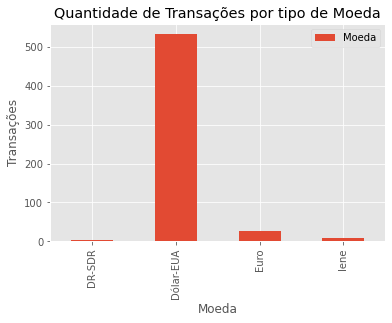

In [30]:
#Transações x tipo de moedas exceto $Real
filtroMoeda = df.Moeda != 'Real' 
dfMoeda = df.loc[filtroMoeda]
dfMoeda.groupby(['Moeda']).Moeda.count().plot.bar(title ="Quantidade de Transações por tipo de Moeda" )
plt.xlabel("Moeda")
plt.ylabel("Transações")
plt.legend();



## Transações no ano de 2021 por tipo de Moeda



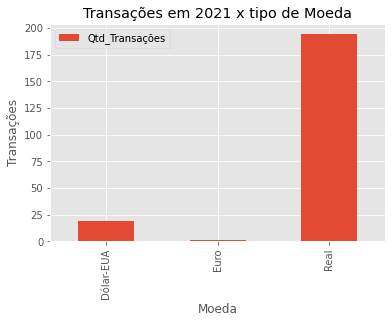

In [31]:
#Transações no ano de 2021 por tipo de Moeda
filtroAno = df.Data.dt.year == 2021
df2021 = df.loc[filtroAno]
df2021.groupby(['Moeda']).Moeda.count().plot.bar(title ='Transações em 2021 x tipo de Moeda', label="Qtd_Transações")
plt.xlabel('Moeda')
plt.ylabel('Transações')
plt.legend();



## Transações no ano de 2021 mês 6 por tipo de Moeda



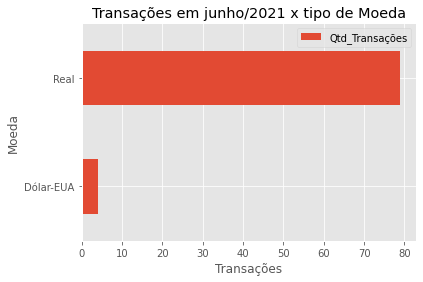

In [32]:
#Transações no ano de 2021 mês 6 por tipo de Moeda
filtroAno = df.Data.dt.year == 2021
filtroMes = df.Data.dt.month == 6
df202106 = df.loc[filtroAno & filtroMes]
df202106.groupby(['Moeda']).Moeda.count().plot.barh(title ="Transações em junho/2021 x tipo de Moeda" , label="Qtd_Transações")
plt.xlabel("Transações")
plt.ylabel("Moeda")
plt.legend();



## Anos que possuem movimentações com moeda Iene 



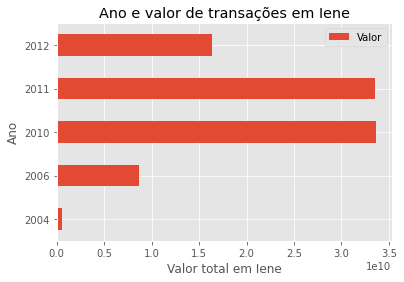

In [33]:
# Anos que possuem movimentações com moeda Iene 
filtroMoeda = df.Moeda == 'Iene'
dfIeneAno = df.loc[filtroMoeda]
dfIeneAno.groupby(df['Data'].dt.year).Valor.sum().plot.barh(title ="Ano e valor de transações em Iene")
plt.xlabel("Valor total em Iene")
plt.ylabel("Ano")
plt.legend();



## Transações por Tipo de Credor



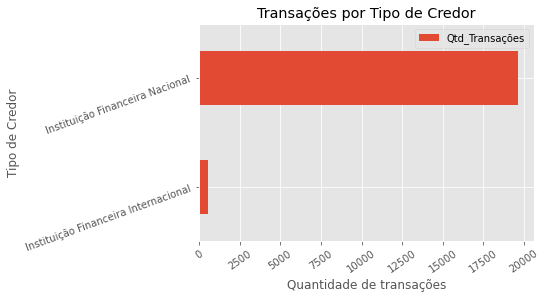

In [34]:
#Transações por Tipo de Credor
filtroTCredor = df.Tipo_de_credor.isin(['Instituição Financeira Internacional','Instituição Financeira Nacional'])
dfCredor = df.loc[filtroTCredor]
dfCredor.groupby(['Tipo_de_credor']).size().plot.barh(title ="Transações por Tipo de Credor" , label="Qtd_Transações")
plt.ylabel("Tipo de Credor")
plt.xlabel("Quantidade de transações")
plt.xticks(rotation=35)
plt.yticks(rotation=20)
plt.legend();



## Transações no ano de 2021 por tipo de Credor



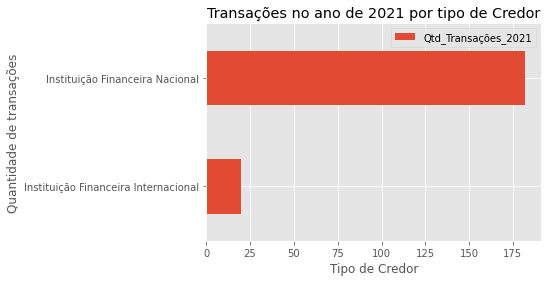

In [35]:
#Transações no ano de 2021 por tipo de Credor
import matplotlib.pyplot as plt
filtroAno = df.Data.dt.year == 2021
filtroTCredor = df.Tipo_de_credor.isin(['Instituição Financeira Internacional','Instituição Financeira Nacional'])
dfCredor2021 = df.loc[filtroTCredor & filtroAno]
dfCredor2021.groupby(['Tipo_de_credor']).size().plot.barh(title="Transações no ano de 2021 por tipo de Credor", 
                                                          label="Qtd_Transações_2021")
plt.xlabel("Tipo de Credor")
plt.ylabel("Quantidade de transações")
plt.legend();



## Soma das transações feitas com moeda nacional por estado no período (2002 a 2021)



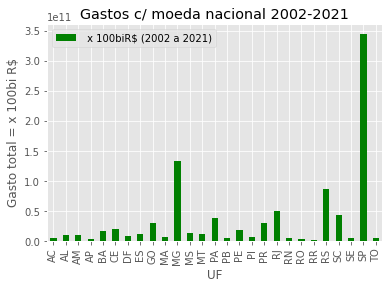

In [42]:
#Soma das transações feitas com moeda nacional por estado no período (2002 a 2021)
filtroMoeda = df.Moeda == 'Real'
df.groupby('UF')['Valor'].sum().plot.bar(color="green", label=' x 100biR$ (2002 a 2021)')
plt.xlabel('UF')
plt.ylabel('Gasto total = x 100bi R$')
plt.title('Gastos c/ moeda nacional 2002-2021')
plt.legend();



## Criação de novas colunas para conversão de moeda estrangeira em Real



In [37]:
#Conversão dos valores para reais (cambio da conversão 30/06/2021)
filtroMoeda = df.Moeda == 'DR-SDR'
df.loc[filtroMoeda, "DR-SDR(R$)"]= df['Valor'].mul(7.16)
filtroMoeda = df.Moeda == 'Dólar-EUA'
df.loc[filtroMoeda, "Dólar-EUA(R$)"]= df['Valor'].mul(4.97)
filtroMoeda = df.Moeda == 'Euro'
df.loc[filtroMoeda, "EURO(R$)"]= df['Valor'].mul(5.89)
filtroMoeda = df.Moeda == 'Iene'
df.loc[filtroMoeda, "Iene(R$)"]= df['Valor'].mul(0.045)

In [38]:
#Transações x Conversão das moedas estrangeiras para reais (cambio da conversão 30/06/2021)
filtroMoeda = df.Moeda == 'Real' 
df.loc[filtroMoeda]
refReal = df.loc[filtroMoeda]

totalReal = refReal.Valor.sum()
totalSDR = df['DR-SDR(R$)'].sum()
totalDolar = df['Dólar-EUA(R$)'].sum()
totalEuro = df['EURO(R$)'].sum()
totalIene = df['Iene(R$)'].sum()

####Confereiar se linha  == 21410 rows
#totalReal2 = refReal.Valor.count()
#totalSDR2 = df['DR-SDR(R$)'].count()
#totalDolar2 = df['Dólar-EUA(R$)'].count()
#totalEuro2 = df['EURO(R$)'].count()
#totalIene2 = df['Iene(R$)'].count()
#print(totalReal2 + totalSDR2 + totalDolar2 + totalEuro2 + totalIene2)



## Gastos convertidos em Reais câmbio atual 30/06/2021 - período (2002 a 2021)



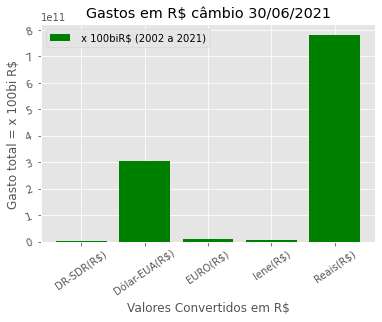

In [39]:
#Gastos convertidos em Reais câmbio atual 30/06/2021 - período (2002 a 2021)
legenda = ['DR-SDR(R$)', 'Dólar-EUA(R$)', 'EURO(R$)', 'Iene(R$)', 'Reais(R$)']
totalEmReais = [totalSDR, totalDolar, totalEuro, totalIene, totalReal]

plt.bar(legenda, totalEmReais, color="green", label=' x 100biR$ (2002 a 2021)')
plt.xlabel('Valores Convertidos em R$')
plt.ylabel('Gasto total = x 100bi R$ ')
plt.title('Gastos em R$ câmbio 30/06/2021')
plt.xticks(rotation=35)
plt.yticks(rotation=20)
plt.legend();



## Quais credores possuem atividades no ano de 2021 no estado de São Paulo?



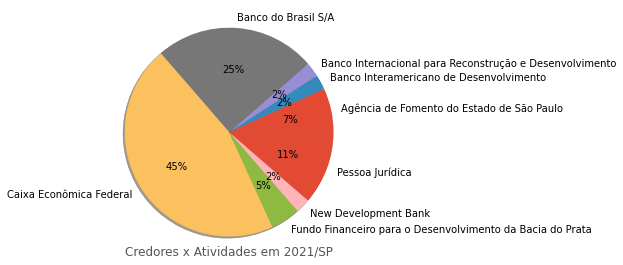

In [40]:
#Quais credores possuem atividades no ano de 2021 no estado de São Paulo?
filtroUF = df.UF == 'SP'
filtroData = df.Data.dt.year == 2021
filtro = df.loc[filtroUF & filtroData]
filtro.groupby(['Credor']).Credor.count().plot.pie(autopct='%1.0f%%', title =" " , radius=1.2, shadow=True)
plt.xlabel("Credores x Atividades em 2021/SP")
plt.ylabel("");